## Q1: Sobel and Laplacian Edge detection 

Write python code from scratch for Sobel Edge, and Laplacian edge detection methods for image (lena.tif) and demonstrate results of each step and also compare final result with OpenCV functions   compare results with OpenCV function.


In [1]:
#Importing Libraries

import numpy as np 
import cv2 
from matplotlib import pyplot as plt 
import PIL 
from time import time 

### Convolution Operation with Sliding Kernel

In [2]:
#Filter slides over the image and returns the region of the image falling under the current filter position
def slide(img, filter_size):

    h, w = img.shape
    for i in range(h - filter_size[0] + 1):
        for j in range(w - filter_size[1] + 1):
            slide_region = img[i : i + filter_size[0], j : j + filter_size[1]]
            yield slide_region, i, j 

#Iteratively calls the slide function and stores the accumulated sum of slide region and filter
def convolve(img, filter):

    h, w = img.shape 
    filter_size = filter.shape
    convolved = np.zeros((h - filter_size[0] + 1, w - filter_size[1] + 1))

    for slide_region, i, j in slide(img, filter_size):
        convolved[i, j] = np.sum(slide_region*filter)

    return convolved 


### Loading the Image

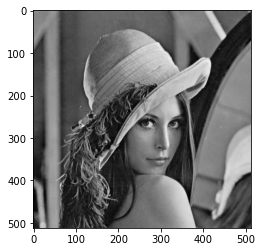

In [3]:
#Reading and Displaying the Image
img = cv2.imread("lena.tif", 0)
plt.imshow(img, cmap = 'gray')

own_times = {"Sobel_Horizontal": None, "Sobel_Vertical": None, "Laplacian": None}
opencv_times = {"Sobel_Horizontal": None, "Sobel_Vertical": None, "Laplacian": None}

### Edge Detection

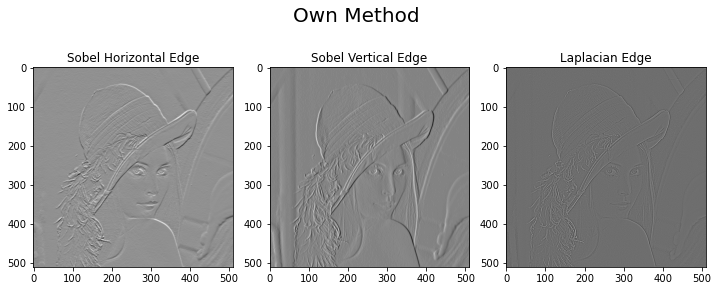

In [4]:
# Kernel Declatration

sobel_horizontal_kernel = np.array([
    [-1, -2, -1], 
    [0, 0, 0], 
    [1, 2, 1]
])

sobel_vertical_kernel = sobel_horizontal_kernel.T

laplacian_kernel = np.array([
    [0, -1, 0], 
    [-1, 4, -1], 
    [0, -1, 0]
])

#Own Method

#Horizontal Sobel Edge
tic = time()
horizontal_edge = convolve(img, sobel_horizontal_kernel)      
toc = time() 
own_times["Sobel_Horizontal"] = toc - tic 

#Vertical Sobel Edge
tic = time()
vertical_edge = convolve(img, sobel_vertical_kernel)            
toc = time() 
own_times["Sobel_Vertical"] = toc - tic 

#Laplacian Edge
tic = time()
laplacian_edge = convolve(img, laplacian_kernel)            
toc = time() 
own_times["Laplacian"] = toc - tic 

fig = plt.figure(figsize = (10, 10))
st = fig.suptitle('Own Method', fontsize = 20)

ax1 = fig.add_subplot(131)
ax1.imshow(horizontal_edge, cmap = 'gray')
ax1.set_title('Sobel Horizontal Edge')

ax2 = fig.add_subplot(132)
ax2.imshow(vertical_edge, cmap = 'gray')
ax2.set_title('Sobel Vertical Edge')

ax3 = fig.add_subplot(133)
ax3.imshow(laplacian_edge, cmap = 'gray')
ax3.set_title('Laplacian Edge')

fig.tight_layout()
fig.subplots_adjust(top = 1.5)


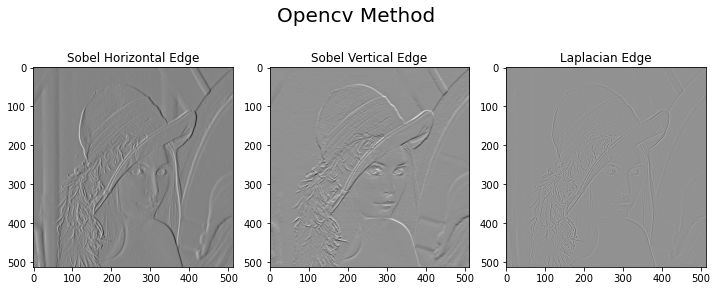

In [6]:
#OpenCV Method 

#Horizontal Sobel Edge
tic = time()
horizontal_edge_opencv = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 3)       
toc = time()
opencv_times["Sobel_Horizontal"] = toc - tic 

#Vertical Sobel Edge
tic = time()
vertical_edge_opencv = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 3)
toc = time() 
opencv_times["Sobel_Vertical"] = toc - tic 

#Laplacian Sobel Edge
tic = time()
laplacian_edge_opencv = cv2.Laplacian(img, cv2.CV_64F)
toc = time() 
opencv_times["Laplacian"] = toc - tic 

fig = plt.figure(figsize = (10, 10))
st = fig.suptitle('Opencv Method', fontsize = 20)

ax1 = fig.add_subplot(131)
ax1.imshow(horizontal_edge_opencv, cmap = 'gray')
ax1.set_title('Sobel Horizontal Edge')

ax2 = fig.add_subplot(132)
ax2.imshow(vertical_edge_opencv, cmap = 'gray')
ax2.set_title('Sobel Vertical Edge')

ax3 = fig.add_subplot(133)
ax3.imshow(laplacian_edge_opencv, cmap = 'gray')
ax3.set_title('Laplacian Edge')

fig.tight_layout()
fig.subplots_adjust(top = 1.5)


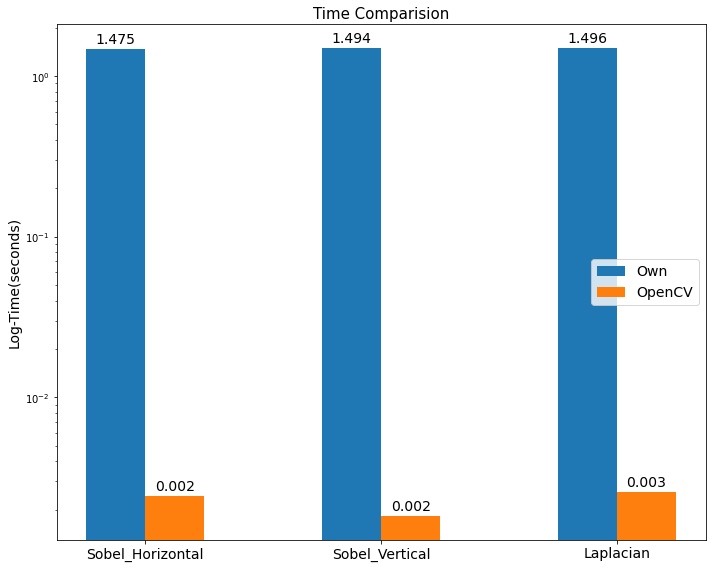

In [7]:
def annotate_bars(bars):

    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            '%.3f'%height,
            xy = (bar.get_x() + bar.get_width()/2, height),
            xytext = (0, 3),
            textcoords = "offset points",
            ha = 'center',
            va = 'bottom',
            fontsize = 14
        )


labels = list(own_times.keys())
otimes = list(own_times.values())
cvtimes = list(opencv_times.values())

x = np.arange(len(labels))
width = 0.25 

fig, ax = plt.subplots(figsize = (10, 8))
rects1 = ax.bar(x - width/2, otimes, width, label = 'Own')
rects2 = ax.bar(x + width/2, cvtimes, width, label = 'OpenCV')

ax.set_ylabel('Log-Time(seconds)', fontsize = 14)
ax.set_yscale('log')
ax.set_title('Time Comparision', fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 14)
ax.legend(fontsize = 14, loc = 'center right') 

annotate_bars(rects1)
annotate_bars(rects2)

fig.tight_layout()
plt.show()